#1.Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls -al '/gdrive/My Drive/data'

total 2193336
-rw------- 1 root root    337847 Feb  2 11:56 data_202001.csv
-rw------- 1 root root    314682 Feb  2 10:30 data_202002.csv
-rw------- 1 root root    335953 Feb  2 10:35 data_202003.csv
-rw------- 1 root root    988308 Feb  2 11:58 data_2020.csv
-rw------- 1 root root   9453240 Aug  7  2019 marathon_2015_2017.csv
-rw------- 1 root root   4228123 Apr 29  2017 marathon_results_2015.csv
-rw------- 1 root root   4244383 Apr 29  2017 marathon_results_2016.csv
-rw------- 1 root root   4196246 Apr 29  2017 marathon_results_2017.csv
-rw------- 1 root root 783889122 Jan 30 17:16 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Jan 31 06:59 TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Jan 31 06:59 TCS_영업소간통행시간_1시간_1개월_202003


#2. Korean Characters

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (2,909 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146442 files and d

런타임 - 런타임 다시 시작

matplotlib의 폰트를 Nanum 폰트로 지정

In [1]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [3]:
plt.rc('font', family='NanumBarunGothic')

#3. Load Data

In [4]:
import pandas as pd

In [5]:
file = '/gdrive/My Drive/data/data_2020.csv'
data = pd.read_csv(file)

In [6]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37356 non-null  int64
 1   집계시      37356 non-null  int64
 2   출발영업소코드  37356 non-null  int64
 3   도착영업소코드  37356 non-null  int64
 4   통행시간     37356 non-null  int64
 5   요일       37356 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


#4. Histplot

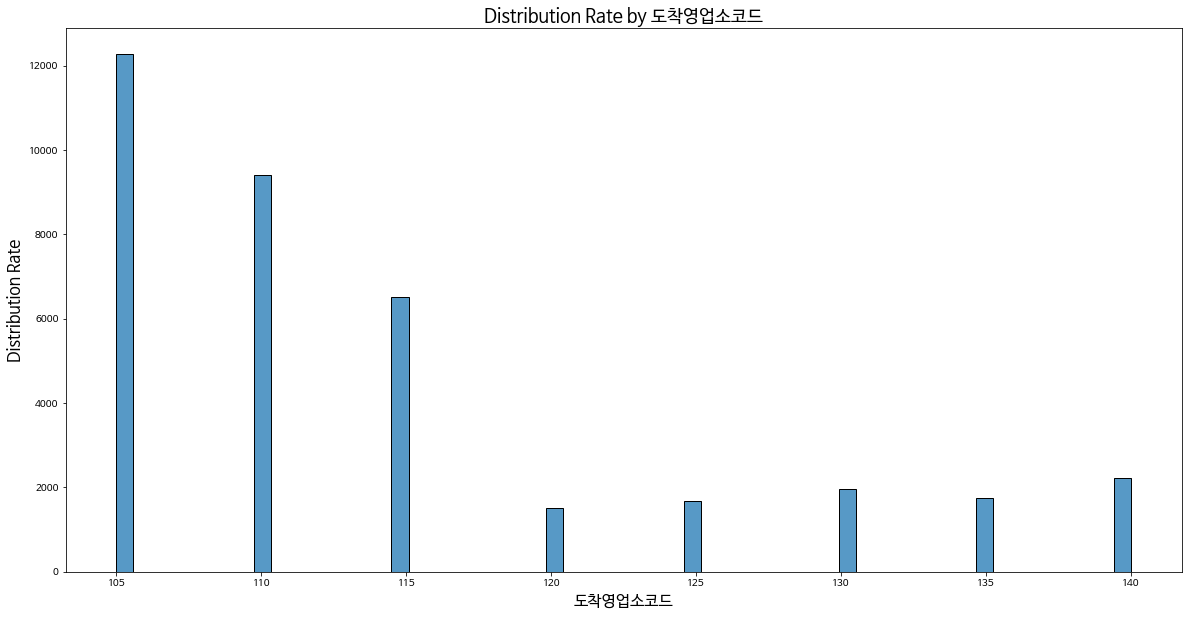

In [11]:
# Configure figure size
plt.figure(figsize=(20,10))
# Create histogram - Distribution Rate
data_destination = sns.histplot(data=data, x='도착영업소코드')
data_destination.set_xlabel('도착영업소코드',fontdict= {'size':16})
data_destination.set_ylabel('Distribution Rate',fontdict= {'size':16})
data_destination.set_title('Distribution Rate by 도착영업소코드',fontsize=18)
plt.show()

#5. Countplot

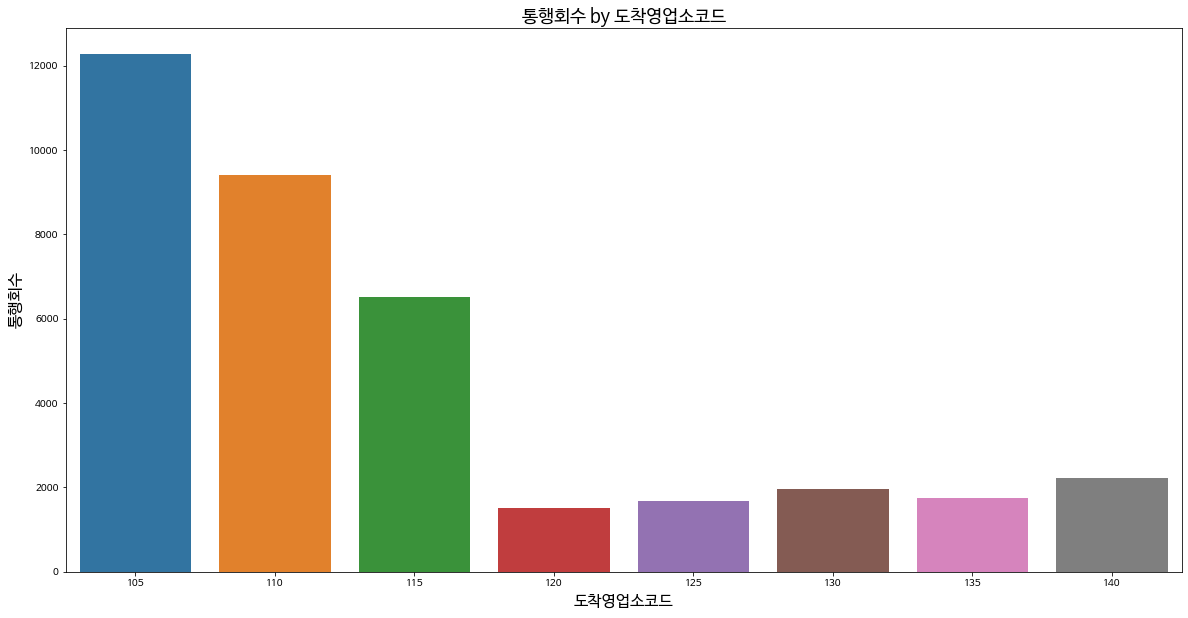

In [12]:
# Configure figure size
plt.figure(figsize=(20,10))
# Create histogram - Distribution Rate
data_destination = sns.countplot(data=data, x='도착영업소코드')
data_destination.set_xlabel('도착영업소코드',fontdict= {'size':16})
data_destination.set_ylabel('통행회수',fontdict= {'size':16})
data_destination.set_title('통행회수 by 도착영업소코드',fontsize=18)
plt.show()

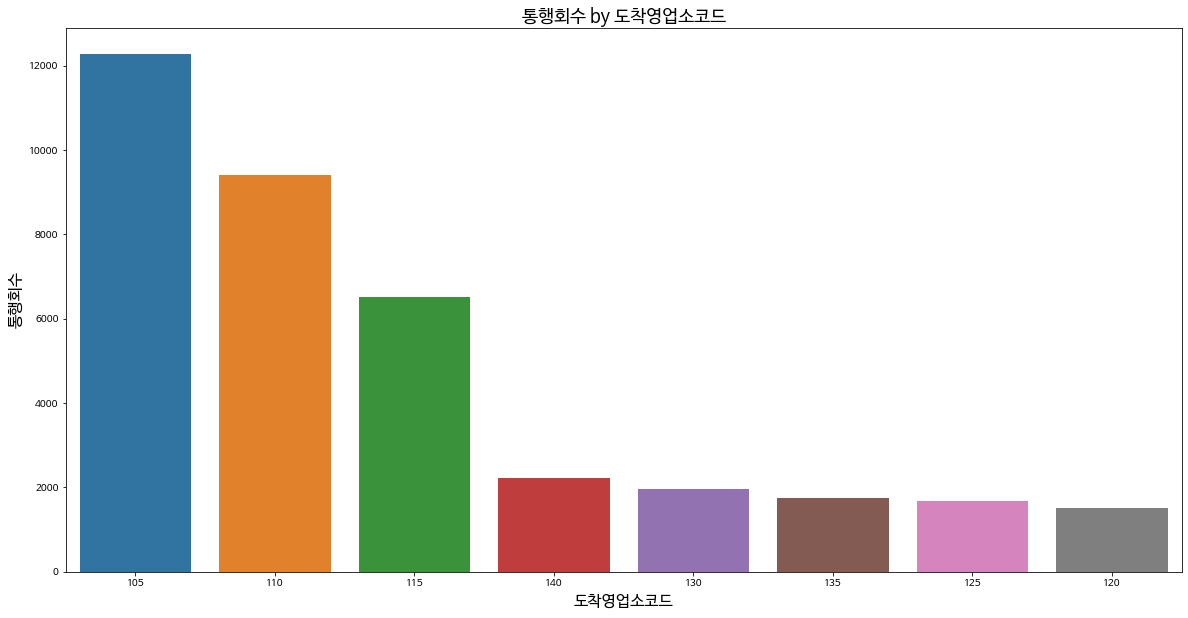

In [13]:
# Configure figure size
plt.figure(figsize=(20,10))
# Create histogram - Distribution Rate
data_destination = sns.countplot(data=data, x='도착영업소코드', order= data['도착영업소코드'].value_counts().index)
data_destination.set_xlabel('도착영업소코드',fontdict= {'size':16})
data_destination.set_ylabel('통행회수',fontdict= {'size':16})
data_destination.set_title('통행회수 by 도착영업소코드',fontsize=18)
plt.show()

#6. Histogram

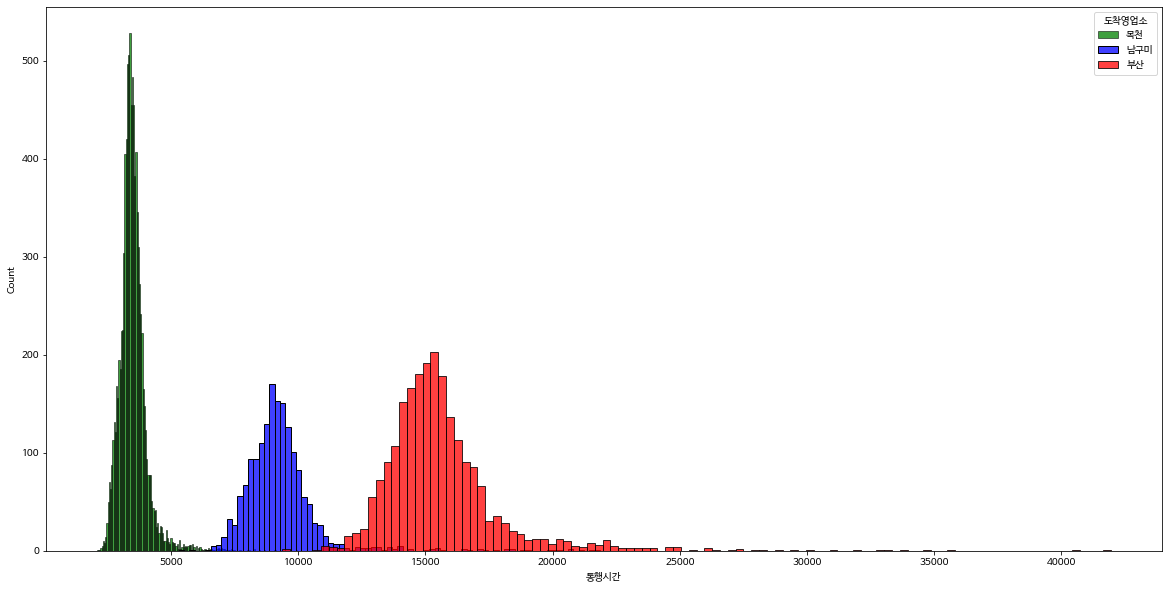

In [14]:
plt.figure(figsize=(20,10))
sns.histplot(data[data['도착영업소코드'] == 110]['통행시간'], color='green', label='목천')
sns.histplot(data[data['도착영업소코드'] == 125]['통행시간'], color='blue', label='남구미')
sns.histplot(data[data['도착영업소코드'] == 140]['통행시간'], color='red', label='부산')
plt.legend(title='도착영업소')
plt.show()

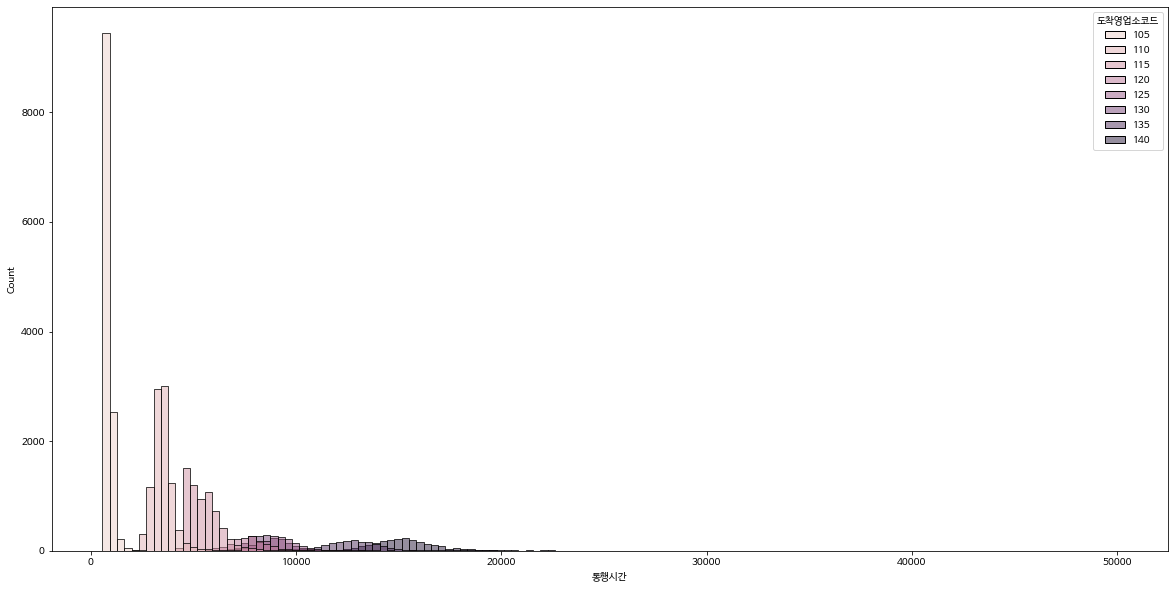

In [17]:
plt.figure(figsize=(20,10))
sns.histplot(data=data, x='통행시간', hue='도착영업소코드')
plt.show()